## Geometric Interpretation of the SVD

In [1]:
# Import neccessary modules
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Define rotation matrixes and resulting matrix
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sig = np.diag([3, 1, 0.5]) # x-dir, y-dir, z-dir, respectively

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Create combined matrix
X = Rz @ Ry @ Rx @ Sig

In [3]:
def plot_sphere_original_deformed():
# Plot sphere
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')
    u = np.linspace(-np.pi, np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    surf1 = ax1.plot_surface(x, y, z, cmap='jet', alpha=0.6)
    surf1.set_edgecolor('k')
    ax1.set_xlim3d(-2, 2)
    ax1.set_ylim3d(-2, 2)
    ax1.set_zlim3d(-2, 2)

    xR = np.zeros_like(x)
    yR = np.zeros_like(y)
    zR = np.zeros_like(z)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            vec = [x[i,j], y[i,j], z[i,j]]
            vecR = X @ vec
            xR[i,j] = vecR[0]
            yR[i,j] = vecR[1]
            zR[i,j] = vecR[2]

    ax2 = fig.add_subplot(122, projection='3d')
    surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet', alpha=0.6)
    surf2.set_edgecolor('k')
    ax2.set_xlim3d(-2, 2)
    ax2.set_ylim3d(-2, 2)
    ax2.set_zlim3d(-2, 2)

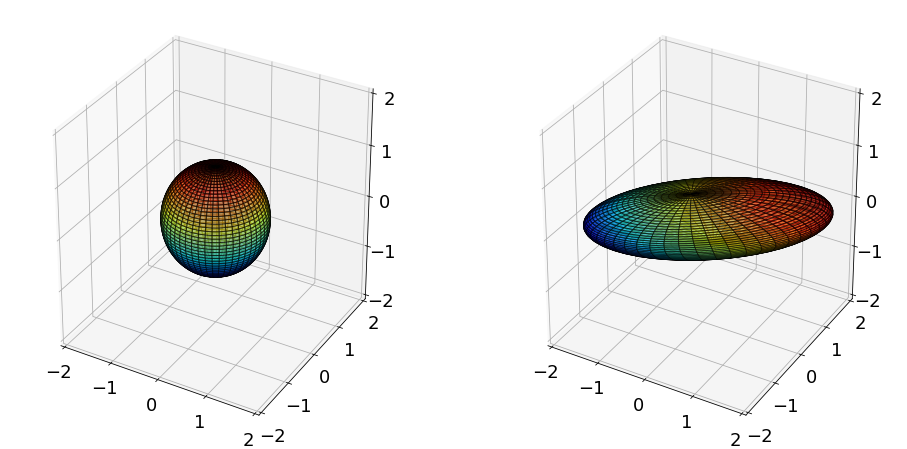

In [4]:
# Plot original sphere, deform it, then plot the deformed ellipsoid
plot_sphere_original_deformed()

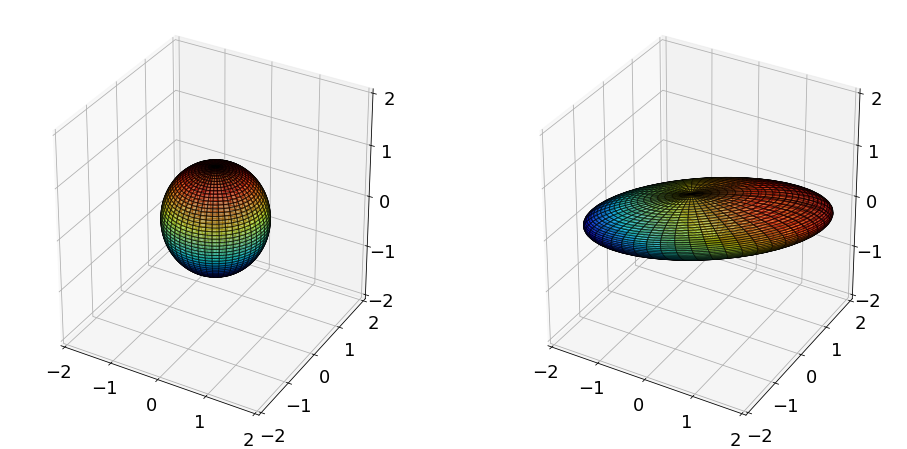

In [5]:
# Now take the SVD of X and reconstruct same deformation as the actual X matrix from U and S
U, S, VT = np.linalg.svd(X, full_matrices=False)
X = U @ np.diag(S)
plot_sphere_original_deformed()

### Conclusions:
Here we can see that the matrix U completely encompasses the result of the rotation matrices and S encompasses the result of S, or the stretching matrix